<a href="https://colab.research.google.com/github/aybukekcr/MultilayerPerceptron/blob/main/MultiLayerPerecptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Train Loss: 0.7456, Val Loss: 0.7007, Test Loss: 0.6982, Test Acc: 0.4974, Train Acc: 0.4417, Val Acc: 0.5032
Epoch 100, Train Loss: 0.5985, Val Loss: 0.5909, Test Loss: 0.6043, Test Acc: 0.7422, Train Acc: 0.8450, Val Acc: 0.7739
Epoch 200, Train Loss: 0.5663, Val Loss: 0.5566, Test Loss: 0.5663, Test Acc: 0.8562, Train Acc: 0.8962, Val Acc: 0.8694
Epoch 300, Train Loss: 0.5511, Val Loss: 0.5453, Test Loss: 0.5500, Test Acc: 0.8912, Train Acc: 0.9233, Val Acc: 0.9045
Epoch 400, Train Loss: 0.5438, Val Loss: 0.5423, Test Loss: 0.5442, Test Acc: 0.9054, Train Acc: 0.9409, Val Acc: 0.9140
Epoch 500, Train Loss: 0.5385, Val Loss: 0.5393, Test Loss: 0.5399, Test Acc: 0.9145, Train Acc: 0.9505, Val Acc: 0.9299
Epoch 600, Train Loss: 0.5353, Val Loss: 0.5376, Test Loss: 0.5383, Test Acc: 0.9184, Train Acc: 0.9569, Val Acc: 0.9299
Epoch 700, Train Loss: 0.5326, Val Loss: 0.5362, Test Loss: 0.5366, Test Acc: 0.9223, Train Acc: 0.9593, Val Acc: 0.9299
Epoch 800, Train Loss: 0.5297, Val

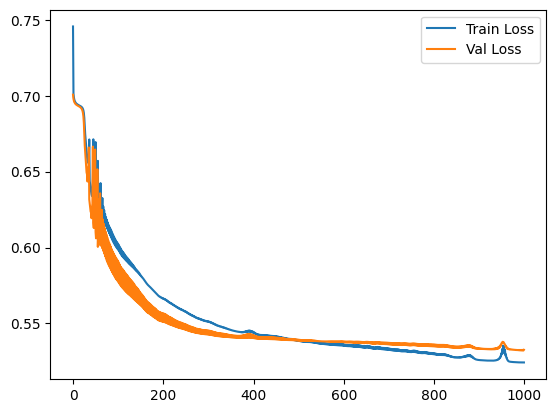

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

torch.manual_seed(190401035)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        torch.manual_seed(1)
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out


train_data = pd.read_csv('sample_data/cure_the_princess_train.csv')
val_data = pd.read_csv('sample_data/cure_the_princess_validation.csv')
test_data = pd.read_csv('sample_data/cure_the_princess_test.csv')


x_train = torch.tensor(train_data.iloc[:, :-1].values, dtype=torch.float)
y_train = torch.tensor(train_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_val = torch.tensor(val_data.iloc[:, :-1].values, dtype=torch.float)
y_val = torch.tensor(val_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_test = torch.tensor(test_data.iloc[:, :-1].values, dtype=torch.float)
y_test = torch.tensor(test_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)

batch_size = 16

input_size = x_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
output_size = 1
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model.parameters(), lr=0.1)


num_epochs = 1000
train_losses = []
val_losses = []
test_losses = []
train_accs = []
val_accs = []
test_accs = []
for epoch in range(num_epochs):
    
    model.train()
    
    
    y_pred_train = model(x_train)
    train_loss = criterion(y_pred_train, y_train)
    train_losses.append(train_loss.item())

    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    
    model.eval()
    
    
    with torch.no_grad():
        train_acc = ((y_pred_train > 0.5).float() == y_train).float().mean()
        train_accs.append(train_acc.item())

    
    with torch.no_grad():
        y_pred_val = model(x_val)
        val_loss = criterion(y_pred_val, y_val)
        val_losses.append(val_loss.item())
        val_acc = ((y_pred_val > 0.5).float() == y_val).float().mean()
        val_accs.append(val_acc.item())

    
    with torch.no_grad():
        y_pred_test = model(x_test)
        test_loss = criterion(y_pred_test, y_test)
        test_losses.append(test_loss.item())
        test_acc = ((y_pred_test > 0.5).float() == y_test).float().mean()
        test_accs.append(test_acc.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.show()